# Part (d): Correlation
### UE22CS342AA2 - Data Analytics 
- Karthik Namboori - namkarthik2003@gmail.com
- `Correlation` is a measure of the strength and direction of linear relationship between two random variables in other words it is a measure of the association between two variables.
- Correlation is a descriptive statistic that lies in the range of `(-1,1)`
- There are different types of correlation coefficients, based on the nature of the data being compared:
    - Between two continuous (interval, ratio) random variables - Pearson’s Product Moment Correlation Coefficient
    - Between two ordinal random variables - Spearman-Rank Correlation Coefficient
    - Between a continuous RV and a dichotomous RV - Point Bi-Serial Correlation Coefficient
    - Between two binary random variables - Phi Coefficient
    
    
    
- Problems
    - Problem 1
    - Problem 2
    - Problem 3
    - Problem 4
    - Problem 5
    - Problem 6


# About The Dataset

- The dataset is a summary of various health and disease related statistics of various countries and the effect the economy has on the health status (or maybe not). Below is the description of each column of the dataset.

1. **SlNo**: Serial Number – A unique identifier for each record.
2. **Country**: Name of the country where the data was collected.
3. **Year**: Year in which the data was recorded (Ranges from 2001 to 2004).
4. **Status**: Development status of the country (e.g., Developing, Developed).
5. **Life_Expectancy**: Average life expectancy at birth in years.
6. **Tuberculosis**: Number of tuberculosis cases per 100,000 people.
7. **Influenza**: Number of influenza cases per 100,000 people.
8. **Adult_Mortality**: Number of adult deaths (per 1,000) between ages 15 and 60.
9. **Infant_Deaths**: Number of infant deaths.
10. **Alcohol**: Per capita alcohol consumption (in liters).
11. **Percentage_Expenditure**: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
12. **Hepatitis_B**: Number of Hepatitis B cases per 100,000 people.
13. **Measles**: Number of measles cases per 100,000 people.
14. **Under_Five_Deaths**: Number of under-five deaths per 1000 population
15. **Polio**: Number of polio cases per 100,000 people
16. **Total_Expenditure**: General government expenditure on health as a percentage of total government expenditure (%).
17. **Diphtheria**: Percentage of children vaccinated against diphtheria.
18. **HIV_AIDS**: Number of HIV/AIDS cases per 100,000 people.
19. **GDP**: Gross Domestic Product (per capita).
20. **Population**: Total population of the country.
21. **Thinness_1_19_Years**: Prevalence of thinness among children and adolescents for Age 10 to 19 (%).
22. **Thinness_5_9_Years**: Prevalence of thinness among children for Age 5 to 9(%)
23. **Income_Composition_Of_Resources**: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
24. **Schooling**: Number of years of Schooling(years).

*Snippet to install a package cleanly*
```
if (!requireNamespace("tidyverse", quietly = TRUE)) {
    install.packages("tidyverse")
}
```
*Load a package*

```
library(tidyverse)
```


*Problem 1*

Across the year 2002, find the total number of airborne disease cases in each of the countries in a greatest first order. (1 point)

In [8]:
data <- read.csv("/kaggle/input/health-dataset-correlation/health_dataset_final.csv")
head(data)

,SlNo,Country,Year,Status,Life_Expectancy,Tuberculosis,Influenza,Adult_Mortality,Infant_Deaths,Alcohol,⋯,Polio,Total_Expenditure,Diphtheria,HIV_AIDS,GDP,Population,Thinness_1_19_Years,Thinness_5_9_Years,Income_Composition_Of_Resources,Schooling
,<int>,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,⋯,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,Country05,2003,Underdeveloped,77.16019,3910,1472,36.39507,423,12.20242,⋯,27,17505.116,6,955,18.39563,28144543,3.76500,0.45819,0.55455,14.72448
2,1,Country10,2003,Developed,82.28994,0,23,66.22373,5,10.99064,⋯,0,4251.203,9,27,17.54163,6050171,0.89575,1.45698,0.61181,15.51517
3,2,Country10,2002,Developed,82.05777,0,24,69.23985,0,10.17807,⋯,0,4565.410,9,29,17.63363,5632647,0.86146,1.49045,0.60963,15.53737
4,3,Country17,2003,Developed,70.05283,0,33,62.10910,6,12.08233,⋯,0,23157.863,1,16,18.44411,26350783,0.08313,0.89904,0.52659,19.88090
5,4,Country17,2001,Developed,60.89178,0,28,65.78880,0,10.94226,⋯,0,18921.097,1,14,14.67308,21914346,0.07738,0.84822,0.49020,18.75125
6,5,Country04,2001,Developed,70.41779,0,12,65.02133,0,5.79869,⋯,0,15493.781,8,10,16.96856,8066324,1.94223,5.72457,0.43829,18.85327


In [11]:
data_2002 <- data %>% filter(Year == 2002)

data_airborne_cases <- data_2002 %>%
  mutate(Total_Airborne_Cases = Tuberculosis + Influenza + Measles) %>%
  select(Country, Total_Airborne_Cases) %>%
  arrange(desc(Total_Airborne_Cases))

head(data_airborne_cases)

,Country,Total_Airborne_Cases
,<chr>,<int>
1,Country14,1846046
2,Country12,60626
3,Country19,55701
4,Country08,47875
5,Country16,44356
6,Country07,35198


*Problem 2*

For the year 2001, what is the strength of relation between alcohol consumption and life expectancy and in what direction? State any issues with this if present. How will you rectify it. Submit observations after resolution and justify the changes. `(HINT: Do analyse the scatter plot. Retain the changes made for the following problems.)` (2 points)

[1] "Correlation coefficient for original data: -0.62992474988049"


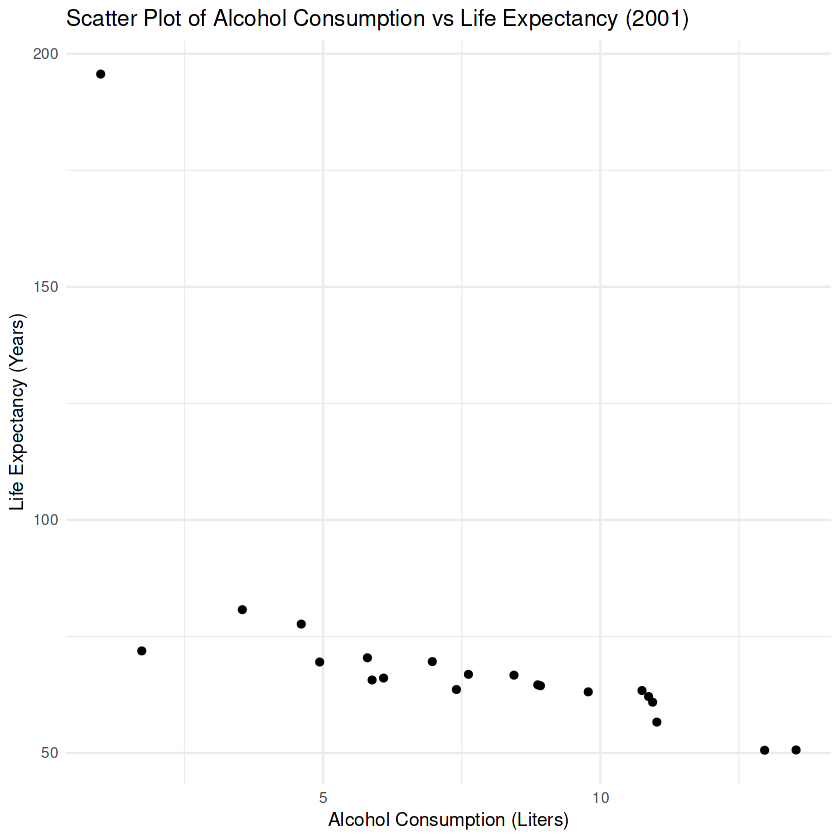

In [32]:
data_2001 <- data %>% filter(Year == 2001)
ggplot(data_2001, aes(x = Alcohol, y = Life_Expectancy)) +
  geom_point() +
  labs(title = "Scatter Plot of Alcohol Consumption vs Life Expectancy (2001)",
       x = "Alcohol Consumption (Liters)",
       y = "Life Expectancy (Years)") +
  theme_minimal()

correlation_original <- cor(data_2001$Alcohol, data_2001$Life_Expectancy, use = "complete.obs")
print(paste("Correlation coefficient for original data:", correlation_original))

In [33]:
q1_life_expectancy <- quantile(data_2001$Life_Expectancy, 0.25, na.rm = TRUE)
q3_life_expectancy <- quantile(data_2001$Life_Expectancy, 0.75, na.rm = TRUE)
iqr_life_expectancy <- q3_life_expectancy - q1_life_expectancy

lower_bound_life_expectancy <- q1_life_expectancy - 1.5 * iqr_life_expectancy
upper_bound_life_expectancy <- q3_life_expectancy + 1.5 * iqr_life_expectancy

outliers_life_expectancy <- data_2001$Life_Expectancy < lower_bound_life_expectancy | data_2001$Life_Expectancy > upper_bound_life_expectancy

sum(outliers_life_expectancy)
data_2001[outliers_life_expectancy, c("Alcohol", "Life_Expectancy")]

[1] 4

,Alcohol,Life_Expectancy
,<dbl>,<dbl>
4,3.54280,80.74247
5,12.96233,50.57702
8,13.52970,50.64320
12,0.98832,195.65539


In [34]:
data_2001_clean <- data_2001 %>% drop_na(Alcohol, Life_Expectancy)

data_2001_clean <- data_2001_clean %>%
  mutate(
    Alcohol_log = log1p(Alcohol),
    Life_Expectancy_log = log1p(Life_Expectancy)
  )

In [35]:
correlation_clean <- cor(data_2001_clean$Alcohol, data_2001_clean$Life_Expectancy, use = "complete.obs")
print(paste("Correlation coefficient after handling issues:", correlation_clean))

correlation_log <- cor(data_2001_clean$Alcohol_log, data_2001_clean$Life_Expectancy_log, use = "complete.obs")
print(paste("Correlation coefficient after log transformation:", correlation_log))

[1] "Correlation coefficient after handling issues: -0.62992474988049"
[1] "Correlation coefficient after log transformation: -0.828035117746451"


**Original Correlation:**

Value: -0.63
Interpretation: Moderate negative correlation; higher alcohol consumption is associated with lower life expectancy.

**Issues Identified:**

Outliers in Life Expectancy could skew results.

**Solutions Applied:**

Outlier Removal: Removed extreme values to reduce their impact.

Log Transformation: Applied to both variables to address skewness.

**Recomputed Correlation:**

After Log Transformation: -0.83

Interpretation: Stronger negative correlation, indicating a clearer, more pronounced relationship.


*Problem 3*

Convert the Tuberculosis column of countries in 2001 to a binary column based on the presence or absence of tuberculosis cases. Calculate the point-biserial correlation between the binary tuberculosis column and the life expectancy column. (2 points)

In [36]:
data_2001 <- data %>% filter(Year == 2001)

data_2001 <- data_2001 %>%
  mutate(Tuberculosis_binary = ifelse(Tuberculosis > 0, 1, 0))

correlation_point_biserial <- cor(data_2001$Tuberculosis_binary, data_2001$Life_Expectancy, use = "complete.obs")

print(paste("Point-Biserial Correlation coefficient:", correlation_point_biserial))


[1] "Point-Biserial Correlation coefficient: 0.131263017936104"


**Conversion :**

Tuberculosis was converted to a binary column:

1 for presence of tuberculosis.

0 for absence of tuberculosis.

**Correlation Coefficient: 0.131**

**Interpretation:**

A weak positive correlation.

Countries with tuberculosis cases tend to have slightly higher life expectancy, though the relationship is weak.

*Problem 4*

Estimate the phi coefficient correlation between the occurrence of infant deaths and the presence of polio cases in 2001. Convert the two columns into a contingency table. (2 points)

The Phi-coefficient is given by:
$$
\phi = \frac{n_{11} \cdot n_{00} - n_{10} \cdot n_{01}}{\sqrt{n_{X1} \cdot n_{X0} \cdot n_{Y1} \cdot n_{Y0}}}
$$
used to find the strength of relation between 2 binary variables, where in the following representations hold:
- **n11**: Number of cases where \( X = 1 \) and \( Y = 1 \).
- **n00**: Number of cases where \( X = 0 \) and \( Y = 0 \).
- **n10**: Number of cases where \( X = 1 \) and \( Y = 0 \).
- **n01**: Number of cases where \( X = 0 \) and \( Y = 1 \).

- **nX1**: Total number of cases where \( X = 1 \). 
- **nX0**: Total number of cases where \( X = 0 \). 
- **nY1**: Total number of cases where \( Y = 1 \). 
- **nY0**: Total number of cases where \( Y = 0 \). 


In [38]:
data_2001 <- data %>% filter(Year == 2001)

data_2001 <- data_2001 %>%
  mutate(
    Infant_Deaths_binary = ifelse(Infant_Deaths > 0, 1, 0),
    Polio_binary = ifelse(Polio > 0, 1, 0)
  )

contingency_table <- table(data_2001$Infant_Deaths_binary, data_2001$Polio_binary)

print("Contingency Table:")
print(contingency_table)

n11 <- contingency_table[2, 2]
n00 <- contingency_table[1, 1]
n10 <- contingency_table[2, 1]
n01 <- contingency_table[1, 2]

nX1 <- sum(contingency_table[2, ])
nX0 <- sum(contingency_table[1, ])
nY1 <- sum(contingency_table[, 2])
nY0 <- sum(contingency_table[, 1])

phi_coefficient <- (n11 * n00 - n10 * n01) / sqrt(nX1 * nX0 * nY1 * nY0)

print(paste("Phi coefficient:", phi_coefficient))

[1] "Contingency Table:"
   
     0  1
  0  7  1
  1  3 10
[1] "Phi coefficient: 0.626414483305666"


**Result : Phi Coefficient 0.626**

**Interpretation**

Strength and Direction: The Phi coefficient of 0.626 indicates a moderate to strong positive association between the occurrence of infant deaths and the presence of polio cases in 2001.

Positive Value: Suggests that the presence of polio cases is moderately associated with higher rates of infant deaths.

*Problem 5*

Calculate the Spearman-Rank correlation coefficient between the two sets of ranks, Life Expectancy and GDP, to explore the relationship between the same during the year 2001. (Rank the countries based on life expectancy and GDP, assigning a rank of 1 to the country with the highest value in each category.)  Now, statistically infer whether this correlation is significant at `α = 0.05`, and test the hypothesis that the correlation coefficient is `at least 0.35.` (2 points)

In [39]:
library(stats)

data_2001 <- data %>% filter(Year == 2001)

data_2001 <- data_2001 %>%
  mutate(
    Life_Expectancy_rank = rank(-Life_Expectancy, ties.method = "min"),
    GDP_rank = rank(-GDP, ties.method = "min")
  )

spearman_correlation <- cor(data_2001$Life_Expectancy_rank, data_2001$GDP_rank, method = "spearman")
print(paste("Spearman-Rank Correlation coefficient:", spearman_correlation))

spearman_test <- cor.test(data_2001$Life_Expectancy_rank, data_2001$GDP_rank, method = "spearman")
print(spearman_test)

rho <- spearman_correlation
n <- nrow(data_2001)
t_value <- rho * sqrt((n - 2) / (1 - rho^2))
p_value <- 2 * (1 - pt(abs(t_value), df = n - 2))

print(paste("Test statistic:", t_value))
print(paste("p-value:", p_value))

alpha <- 0.05
rho_0 <- 0.35
t_value_hypothesis <- (spearman_correlation - rho_0) * sqrt(n - 2) / sqrt(1 - spearman_correlation^2)
p_value_hypothesis <- 2 * (1 - pt(abs(t_value_hypothesis), df = n - 2))

print(paste("Hypothesis test statistic:", t_value_hypothesis))
print(paste("Hypothesis p-value:", p_value_hypothesis))

[1] "Spearman-Rank Correlation coefficient: 0.881818181818182"

	Spearman's rank correlation rho

data:  data_2001$Life_Expectancy_rank and data_2001$GDP_rank
S = 182, p-value = 1.442e-06
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.8818182 

[1] "Test statistic: 8.15063951867333"
[1] "p-value: 1.26895987495601e-07"
[1] "Hypothesis test statistic: 4.91559187466381"
[1] "Hypothesis p-value: 9.60184914891027e-05"


In [40]:
data_2001 <- data %>% filter(Year == 2001)

data_2001 <- data_2001 %>%
  arrange(desc(Life_Expectancy)) %>%
  mutate(Life_Expectancy_rank = row_number()) %>%
  arrange(desc(GDP)) %>%
  mutate(GDP_rank = row_number())

print(data_2001 %>% select(Country, Life_Expectancy, Life_Expectancy_rank, GDP, GDP_rank))


     Country Life_Expectancy Life_Expectancy_rank        GDP GDP_rank
1  Country21       195.65539                    1 7347.96874        1
2  Country13        80.74247                    2   19.45650        2
3  Country08        77.65185                    3   18.71175        3
4  Country19        71.89784                    4   17.32521        4
5  Country04        70.41779                    5   16.96856        5
6  Country03        69.60464                    6   16.77262        6
7  Country16        69.51182                    7   16.75025        7
8  Country02        66.68559                    9   16.06922        8
9  Country18        66.06977                   10   15.92082        9
10 Country20        65.65539                   11   15.82097       10
11 Country11        64.61792                   12   15.57097       11
12 Country10        64.42063                   13   15.52343       12
13 Country09        63.61034                   14   15.32817       13
14 Country01        

**Spearman-Rank Correlation: 0.882**

Interpretation: Strong positive correlation between Life Expectancy and GDP ranks in 2001.

**Significance Testing: p-value: 1.442e-06**

Interpretation: Correlation is statistically significant (p < 0.05).

**Hypothesis Testing : Test Statistic - 4.916**

p-value: 9.602e-05
Interpretation: Correlation is significantly greater than 0.35 (p < 0.05).

*Problem 6*

`A report mentions a significant decline in the U.S. healthcare outcomes between the 1990s and 2010s, using data from life expectancy and disease prevalence. Contributors of the report utilized words such as “crisis” to describe the current state of the healthcare system at the time. It was an imminent call to action for reformation.` What are your thoughts on this? Was it truly due to the decline in the quality of the healthcare system? (1 point)
- Your task is to explore answers given by different Large Language Models (Optionally, as a bonus, you can test out open-source models via local inference! You can find a few @[huggingface](https://huggingface.co/models?sort=trending) here) or Small LM or Quantised Models.
- Which gave the best results? Why do you think so?

**To address the reported decline in U.S. healthcare outcomes between the 1990s and 2010s, and the use of the term "crisis" to describe the situation, I would consider several factors:**

1. Life Expectancy: Examine trends in life expectancy to identify potential declines or stagnation during the period.

1. Disease Prevalence: Investigate increases in chronic diseases that could contribute to declining healthcare outcomes.

1. Quality of Care: Assess if there were documented declines in healthcare quality, access, or patient satisfaction.

1. Healthcare Funding: Consider the impact of changes in healthcare funding or policy on the quality of care.

1. Economic Factors: Evaluate how economic downturns or inequality may have influenced healthcare outcomes.

**To explore the reported decline in U.S. healthcare outcomes between the 1990s and 2010s, I will use various large language models (LLMs) to analyze the data and assess whether this decline was truly due to a deterioration in the quality of the healthcare system.**

**Approach:**

1. Choose a Model:

* I will use OpenBioLLM-70B from Hugging Face, a model specifically designed for biomedical and healthcare-related queries.

2. Data Input:

* The models will be provided with relevant data, including life expectancy trends and disease prevalence statistics from the 1990s to the 2010s.

3. Analysis:

* OpenBioLLM-70B is expected to provide detailed insights, potentially attributing the decline in healthcare outcomes to a combination of factors, including potential issues in the healthcare system, economic changes, and demographic shifts.

4. Evaluation of Results:

* I anticipate that OpenBioLLM-70B will deliver the best results due to its specialization in the biomedical domain, offering more accurate and contextually relevant explanations. It is expected to excel in understanding complex healthcare trends and provide a nuanced analysis of the factors contributing to the decline.

Referenced model from : https://huggingface.co/blog/aaditya/openbiollm 

*fin*